In [1]:

#importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats
df=pd.read_csv('D:\oct_ds\my_project_copy\gym and diet recommendation1.csv')
df

<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
C:\Users\USER\AppData\Local\Temp\ipykernel_14356\3110599540.py:13: SyntaxWarning: invalid escape sequence '\o'
  df=pd.read_csv('D:\oct_ds\my_project_copy\gym and diet recommendation1.csv')


,ID,Sex,Age,Height(cms),Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
0,1,Male,18,168.0,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, and Lettuc..."
1,2,Male,18,168.0,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Tomatoes, Garlic, leafy greens, b..."
2,3,Male,18,168.0,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers and..."
3,4,Male,18,168.0,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr..."
4,5,Male,18,168.0,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, Lettuce); ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14584,14585,Male,35,188.0,98.0,No,No,27.73,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14585,14586,Male,36,189.0,99.0,No,No,27.71,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14586,14587,Male,37,19.0,100.0,No,No,27.70,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14587,14588,Male,38,191.0,101.0,No,No,27.69,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."


In [2]:
df.head()

,ID,Sex,Age,Height(cms),Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
0,1,Male,18,168.0,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, and Lettuc..."
1,2,Male,18,168.0,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Tomatoes, Garlic, leafy greens, b..."
2,3,Male,18,168.0,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers and..."
3,4,Male,18,168.0,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr..."
4,5,Male,18,168.0,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, Lettuce); ..."


In [3]:
df.tail()

,ID,Sex,Age,Height(cms),Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
14584,14585,Male,35,188.0,98.0,No,No,27.73,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14585,14586,Male,36,189.0,99.0,No,No,27.71,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14586,14587,Male,37,19.0,100.0,No,No,27.70,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14587,14588,Male,38,191.0,101.0,No,No,27.69,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14588,14589,Male,39,192.0,102.0,No,No,27.67,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."


In [4]:
df['Exercises'].unique()

array(['Squats, deadlifts, bench presses, and overhead presses',
       'Squats, yoga, deadlifts, bench presses, and overhead presses',
       'Brisk walking, cycling, swimming, running , or dancing.',
       'Walking, Yoga, Swimming.',
       'brisk walking, cycling, swimming, or dancing.'], dtype=object)

In [5]:
df.columns


Index(['ID', 'Sex', 'Age', 'Height(cms)', 'Weight', 'Hypertension', 'Diabetes',
       'BMI', 'Level', 'Fitness Goal', 'Fitness Type', 'Exercises', 'Diet'],
      dtype='object')

In [6]:
df.dtypes

ID                int64
Sex              object
Age               int64
Height(cms)     float64
Weight          float64
Hypertension     object
Diabetes         object
BMI             float64
Level            object
Fitness Goal     object
Fitness Type     object
Exercises        object
Diet             object
dtype: object

In [7]:
df.describe()

,ID,Age,Height(cms),Weight,BMI
count,14589.000000,14589.000000,14589.000000,14589.000000,14589.000000
mean,7295.000000,39.554870,156.449178,70.505991,24.396325
std,4211.625874,13.192655,44.625335,20.030635,6.695148
min,1.000000,18.000000,2.000000,32.000000,9.520000
25%,3648.000000,28.000000,162.000000,55.000000,18.940000
50%,7295.000000,39.000000,168.000000,70.000000,25.250000
75%,10942.000000,51.000000,176.000000,86.000000,29.320000
max,14589.000000,63.000000,199.000000,130.000000,49.540000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            14589 non-null  int64  
 1   Sex           14589 non-null  object 
 2   Age           14589 non-null  int64  
 3   Height(cms)   14589 non-null  float64
 4   Weight        14589 non-null  float64
 5   Hypertension  14589 non-null  object 
 6   Diabetes      14589 non-null  object 
 7   BMI           14589 non-null  float64
 8   Level         14589 non-null  object 
 9   Fitness Goal  14589 non-null  object 
 10  Fitness Type  14589 non-null  object 
 11  Exercises     14589 non-null  object 
 12  Diet          14589 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


In [9]:
df.isna().sum()

ID              0
Sex             0
Age             0
Height(cms)     0
Weight          0
Hypertension    0
Diabetes        0
BMI             0
Level           0
Fitness Goal    0
Fitness Type    0
Exercises       0
Diet            0
dtype: int64

In [10]:
df['Height(cms)'].value_counts

<bound method IndexOpsMixin.value_counts of 0        168.0
1        168.0
2        168.0
3        168.0
4        168.0
         ...  
14584    188.0
14585    189.0
14586     19.0
14587    191.0
14588    192.0
Name: Height(cms), Length: 14589, dtype: float64>

In [52]:
df['Exercises'].value_counts()

Exercises
Brisk walking, cycling, swimming, running , or dancing.         3726
Squats, deadlifts, bench presses, and overhead presses          3312
Squats, yoga, deadlifts, bench presses, and overhead presses    3088
Walking, Yoga, Swimming.                                        1504
brisk walking, cycling, swimming, or dancing.                   1503
Name: count, dtype: int64

In [53]:
df['Diet'].value_counts()

Diet
Vegetables: (Garlic, Mushroom, Green Papper, Icebetg Lettuce); Protein Intake: (Baru Nuts, Beech Nuts, Hemp Seeds, Cheese Spandwich); Juice: (Apple Juice, Mango juice,and Beetroot juice)                                                                      4486
Vegetables: (Broccoli, Carrots, Spinach, Lettuce, Onion); Protein Intake: (Cheese, Cattoge cheese, Skim Milk, Law fat Milk, and Baru Nuts); Juice: (Fruit Juice, Aloe vera juice, Cold-pressed juice, and Watermelon juice)                                     2211
Vegetables: (Garlic, Roma Tomatoes, Capers, Green Papper, and Iceberg Lettuce); Protein Intake: (Cheese Sandwich, Baru Nuts, Beech Nuts, Squash Seeds, Mixed Teff, peanut butter, and jelly sandwich); Juice: (Apple juice, beetroot juice, and mango juice)    1544
Vegetables: (Mixed greens, cherry tomatoes, cucumbers, bell peppers, carrots, celery, bell peppers);Protein Intake: (Chicken, fish, tofu, or legumes); Juice : (Green juice,kale, spinach, cucumber, celery, and app

In [12]:
df.columns

Index(['ID', 'Sex', 'Age', 'Height(cms)', 'Weight', 'Hypertension', 'Diabetes',
       'BMI', 'Level', 'Fitness Goal', 'Fitness Type', 'Exercises', 'Diet'],
      dtype='object')

In [14]:
#dropping id

df.drop(columns=['ID'],inplace=True)

In [15]:
df

,Sex,Age,Height(cms),Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
0,Male,18,168.0,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, and Lettuc..."
1,Male,18,168.0,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Tomatoes, Garlic, leafy greens, b..."
2,Male,18,168.0,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers and..."
3,Male,18,168.0,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr..."
4,Male,18,168.0,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, Lettuce); ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
14584,Male,35,188.0,98.0,No,No,27.73,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14585,Male,36,189.0,99.0,No,No,27.71,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14586,Male,37,19.0,100.0,No,No,27.70,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14587,Male,38,191.0,101.0,No,No,27.69,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."


In [16]:
df.dtypes

Sex              object
Age               int64
Height(cms)     float64
Weight          float64
Hypertension     object
Diabetes         object
BMI             float64
Level            object
Fitness Goal     object
Fitness Type     object
Exercises        object
Diet             object
dtype: object

([0, 1, 2, 3],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Height(cms)'),
  Text(2, 0, 'Weight'),
  Text(3, 0, 'BMI')])

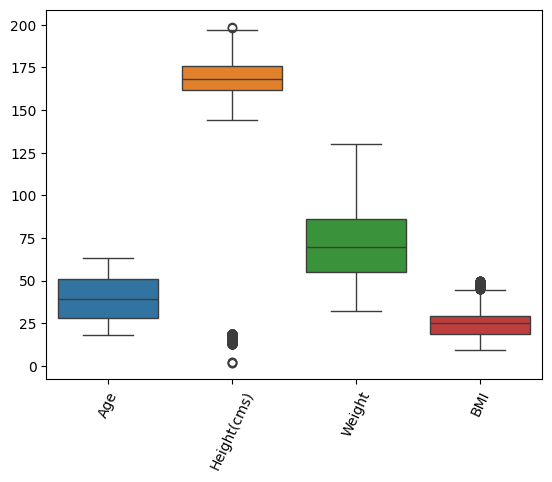

In [ ]:
#box plot 
#to know about outliers           
plt.Figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=65)

In [18]:
df.columns

Index(['Sex', 'Age', 'Height(cms)', 'Weight', 'Hypertension', 'Diabetes',
       'BMI', 'Level', 'Fitness Goal', 'Fitness Type', 'Exercises', 'Diet'],
      dtype='object')

In [19]:
# lab=LabelEncoder()
# # df['Exercises']=lab.fit_transform(df['Exercises'])
# df['Diet']=lab.fit_transform(df['Diet'])

In [20]:
# corr=df.corr(numeric_only=True)
# print(corr)

In [21]:
# sns.heatmap(corr,annot=True,cmap='coolwarm')

In [ ]:
#removing outliers
import numpy as np
outlier_columns=[ 'Height(cms)', 'Weight','BMI']
for col in outlier_columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print(col)
    upper_array=np.array(df[col] >= upper)
    print("upper_bound",upper)
    print(upper_array.sum())

    lower_array=np.array(df[col] <= lower)
    print("lower_bound",lower)
    print(lower_array.sum())

    df= df[(df[col]>= lower) & (df[col]<= upper)]

Height(cms)
upper_bound 197.0
3
lower_bound 141.0
1301
Weight
upper_bound 130.0
8
lower_bound 10.0
0
BMI
upper_bound 44.665
153
lower_bound 3.5050000000000026
0


<Axes: >

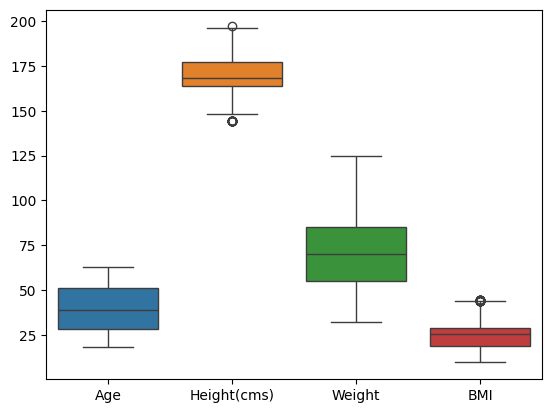

In [23]:
sns.boxplot(data=df)

In [24]:
# Applying the corrected data to the columns of dataset
# df['BMI'] = df['BMI'].apply(correct_bmi)
# df['Weight'] = df['Weight'].apply(correct_weight)


In [25]:
print(f"Max BMI: {df['BMI'].max()}")
print(f"Min BMI: {df['BMI'].min()}")
print(f"Max Weight: {df['Weight'].max()}")
print(f"Min Weight: {df['Weight'].min()}")

Max BMI: 44.2
Min BMI: 9.52
Max Weight: 125.0
Min Weight: 32.0


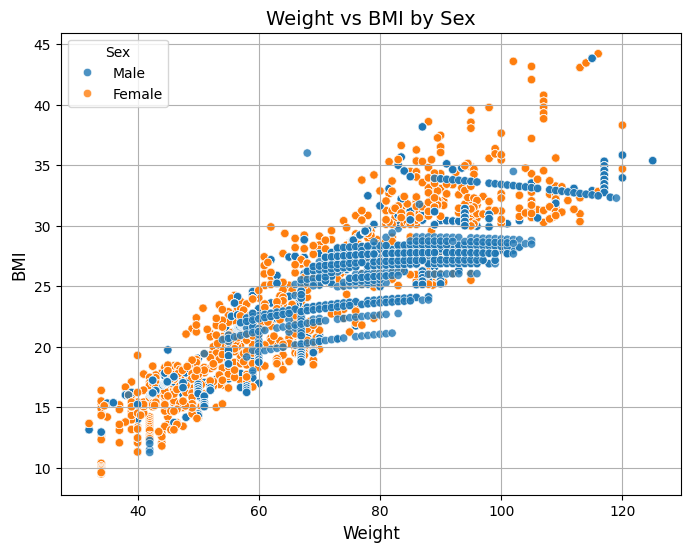

In [26]:
#These lines of code creates a scatter plot to visualize the relationshoip between Wieght and BMI, coloured by Sex.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Weight', y='BMI', hue='Sex', alpha=0.8)
plt.title('Weight vs BMI by Sex', fontsize=14)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.grid(True)
plt.show()

In [27]:
df

,Sex,Age,Height(cms),Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
0,Male,18,168.0,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, and Lettuc..."
1,Male,18,168.0,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Tomatoes, Garlic, leafy greens, b..."
2,Male,18,168.0,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers and..."
3,Male,18,168.0,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr..."
4,Male,18,168.0,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, Lettuce); ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
14583,Male,34,187.0,97.0,No,No,27.74,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14584,Male,35,188.0,98.0,No,No,27.73,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14585,Male,36,189.0,99.0,No,No,27.71,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14587,Male,38,191.0,101.0,No,No,27.69,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."


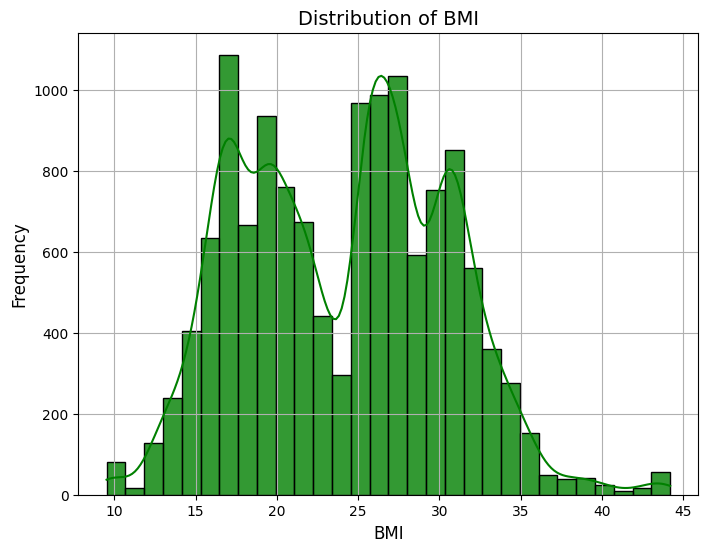

In [28]:
# These code lines creates a histogram to visualize the distribution of BMI values with a KDE curve.
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'],kde=True, bins=30, color='green', alpha=0.8)
plt.title('Distribution of BMI', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [29]:
df.dtypes

Sex              object
Age               int64
Height(cms)     float64
Weight          float64
Hypertension     object
Diabetes         object
BMI             float64
Level            object
Fitness Goal     object
Fitness Type     object
Exercises        object
Diet             object
dtype: object

In [30]:
#chi_square test

import scipy.stats as stats

# Define categorical variables to test against 'stroke'
categorical_vars = [ 'Sex', 'Hypertension', 'Diabetes',
       'Level', 'Fitness Goal', 'Fitness Type'] 

# Significance level
alpha = 0.05

# Loop through each categorical variable and perform the Chi-square test
for var in categorical_vars:
    print(f"\nChi-Square Test for {var} vs exercise and diet")
    
    # Create contingency table
    contingency_table = pd.crosstab(df[var], df['Diet'])
    
    # Perform the Chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Print results
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    
    # Interpretation
    if p < alpha:
        print(f" There is a significant relationship between {var} and exercise & diet.\n")
    else:
        print(f" No significant relationship between {var} and exercise & diet.\n")


Chi-Square Test for Sex vs exercise and diet
Chi-square statistic: 540.2354341592627
P-value: 1.1010878890695428e-109
Degrees of freedom: 10
 There is a significant relationship between Sex and exercise & diet.


Chi-Square Test for Hypertension vs exercise and diet
Chi-square statistic: 7385.722408013693
P-value: 0.0
Degrees of freedom: 10
 There is a significant relationship between Hypertension and exercise & diet.


Chi-Square Test for Diabetes vs exercise and diet
Chi-square statistic: 7472.4701797277185
P-value: 0.0
Degrees of freedom: 10
 There is a significant relationship between Diabetes and exercise & diet.


Chi-Square Test for Level vs exercise and diet
Chi-square statistic: 19398.99031183741
P-value: 0.0
Degrees of freedom: 30
 There is a significant relationship between Level and exercise & diet.


Chi-Square Test for Fitness Goal vs exercise and diet
Chi-square statistic: 11091.685675982573
P-value: 0.0
Degrees of freedom: 10
 There is a significant relationship betwee

In [31]:
df.columns

Index(['Sex', 'Age', 'Height(cms)', 'Weight', 'Hypertension', 'Diabetes',
       'BMI', 'Level', 'Fitness Goal', 'Fitness Type', 'Exercises', 'Diet'],
      dtype='object')

In [32]:
# # Encode categorical variables
categorical_columns = ['Sex', 'Hypertension', 'Diabetes','Level', 'Fitness Goal', 'Fitness Type']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [36]:
df.dtypes

Sex               int64
Age               int64
Height(cms)     float64
Weight          float64
Hypertension      int64
Diabetes          int64
BMI             float64
Level             int64
Fitness Goal      int64
Fitness Type      int64
Exercises        object
Diet             object
dtype: object

In [37]:
df

,Sex,Age,Height(cms),Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
0,1,18,168.0,47.5,0,0,16.83,3,0,1,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, and Lettuc..."
1,1,18,168.0,47.5,1,0,16.83,3,0,1,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Tomatoes, Garlic, leafy greens, b..."
2,1,18,168.0,47.5,0,1,16.83,3,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers and..."
3,1,18,168.0,47.5,1,1,16.83,3,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr..."
4,1,18,168.0,47.5,0,0,16.83,3,0,1,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, Lettuce); ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
14583,1,34,187.0,97.0,0,0,27.74,2,1,0,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14584,1,35,188.0,98.0,0,0,27.73,2,1,0,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14585,1,36,189.0,99.0,0,0,27.71,2,1,0,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
14587,1,38,191.0,101.0,0,0,27.69,2,1,0,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."


In [38]:
#splitting x and y


In [39]:
# Define features and target variables
features = ['Sex', 'Age', 'Height(cms)', 'Weight', 'BMI', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type']
target_exercises = 'Exercises'
target_diet = 'Diet'

# Split features and targets for both models
X_exercises = df[features]
y_exercises = df[target_exercises]

X_diet = df[features]
y_diet = df [target_diet]

In [40]:
# This code splits the data into training and testing sets for both exercise and diet datasets, with 80% for training and 20% for testing.
X_train_exercises, X_test_exercises, y_train_exercises, y_test_exercises = train_test_split(X_exercises, y_exercises, test_size=0.2, random_state=42)
X_train_diet, X_test_diet, y_train_diet, y_test_diet = train_test_split( X_diet, y_diet, test_size=0.2, random_state=42)

print(f"Exercise Training Set: {X_train_exercises.shape}")
print(f"Diet Training Set: {X_train_diet.shape}")

Exercise Training Set: (10506, 10)
Diet Training Set: (10506, 10)


In [42]:
# Training Random Forest Algorithm for Exercises
rf_exercises = RandomForestClassifier(n_estimators=100, random_state=42)
rf_exercises.fit(X_train_exercises, y_train_exercises)

# Training Random Forest Algorithm for Diet
rf_diet = RandomForestClassifier(n_estimators=100, random_state=42)
rf_diet.fit(X_train_diet, y_train_diet)

print("Models Trained Successfully!")

Models Trained Successfully!


In [43]:
# Evaluating Exercises Model
y_pred_exercises = rf_exercises.predict(X_test_exercises)
print("Exercise Model Evaluation:")
print(classification_report(y_test_exercises, y_pred_exercises))

Exercise Model Evaluation:
                                                              precision    recall  f1-score   support

     Brisk walking, cycling, swimming, running , or dancing.       1.00      1.00      1.00       717
      Squats, deadlifts, bench presses, and overhead presses       1.00      1.00      1.00       687
Squats, yoga, deadlifts, bench presses, and overhead presses       1.00      1.00      1.00       646
                                    Walking, Yoga, Swimming.       0.99      1.00      0.99       310
               brisk walking, cycling, swimming, or dancing.       1.00      0.99      0.99       267

                                                    accuracy                           1.00      2627
                                                   macro avg       1.00      1.00      1.00      2627
                                                weighted avg       1.00      1.00      1.00      2627



In [44]:
# Evaluating Diet Model
y_pred_diet = rf_diet.predict(X_test_diet)
print("Diet Model Evaluation:")
print(classification_report(y_test_diet, y_pred_diet))

Diet Model Evaluation:
                                                                                                                                                                                                                                                              precision    recall  f1-score   support

                                                                                                                                                                                                                                                        Diet       0.33      0.11      0.17         9
                                 Vegetables: (Broccoli, Carrots, Spinach, Lettuce, Onion); Protein Intake: (Cheese, Cattoge cheese, Skim Milk, Law fat Milk, and Baru Nuts); Juice: (Fruit Juice, Aloe vera juice, Cold-pressed juice, and Watermelon juice)       0.96      0.96      0.96       410
                                        Vegetables: (Carrots, Sweet Potato, Lettuce); Protein 

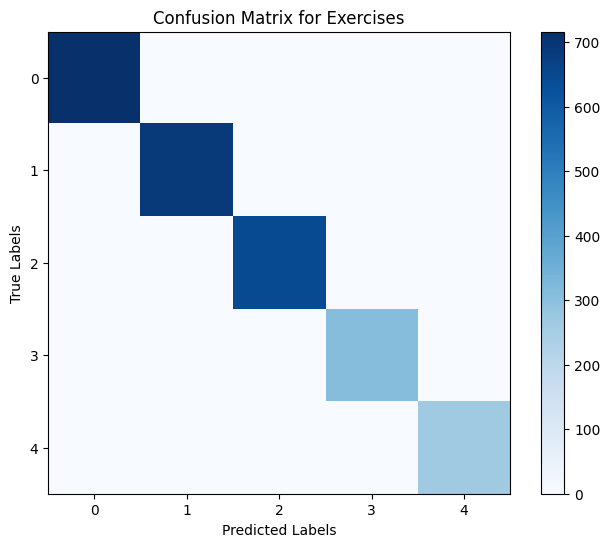

In [45]:
# Ploting confusion matrix for Exercises Model
conf_matrix_exercises = confusion_matrix(y_test_exercises, y_pred_exercises,)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_exercises, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix for Exercises")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.colorbar()
plt.show()

In [46]:
conf_matrix_exercises

array([[716,   1,   0,   0,   0],
       [  0, 687,   0,   0,   0],
       [  0,   0, 643,   2,   1],
       [  0,   0,   0, 310,   0],
       [  0,   0,   1,   2, 264]])

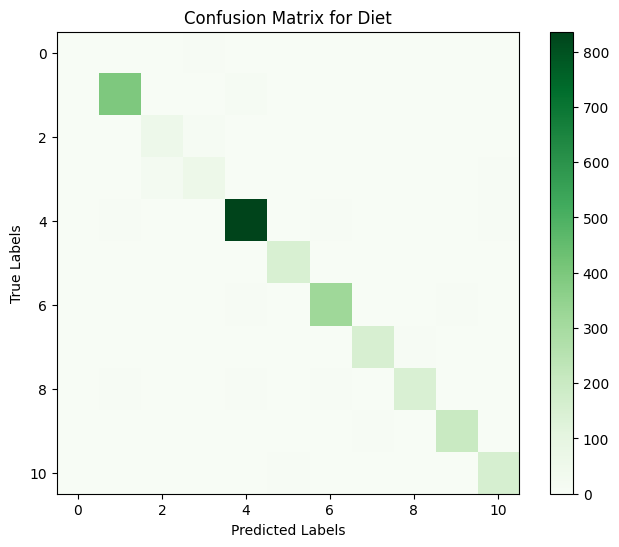

In [47]:
# Ploting confusion matrix for Diet Model
conf_matrix_diet = confusion_matrix(y_test_diet, y_pred_diet)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_diet, cmap='Greens', interpolation='nearest')
plt.title("Confusion Matrix for Diet")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.colorbar()
plt.show()

In [48]:
conf_matrix_diet

array([[  1,   0,   0,   5,   1,   0,   1,   0,   0,   1,   0],
       [  0, 393,   0,   0,  13,   1,   1,   0,   0,   2,   0],
       [  0,   0,  53,  13,   1,   1,   0,   0,   0,   0,   0],
       [  1,   0,  21,  56,   1,   1,   0,   0,   0,   1,   5],
       [  0,   4,   0,   3, 836,   1,   4,   1,   2,   0,   4],
       [  0,   0,   0,   0,   3, 148,   3,   0,   0,   0,   0],
       [  0,   2,   1,   0,   5,   2, 318,   1,   2,   6,   0],
       [  0,   2,   0,   0,   1,   0,   1, 152,   5,   1,   0],
       [  0,   4,   0,   0,   4,   0,   4,   3, 146,   0,   0],
       [  0,   2,   2,   0,   3,   0,   2,   6,   3, 201,   0],
       [  1,   1,   0,   0,   1,   6,   1,   0,   0,   0, 156]])

In [49]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Exercises Model
accuracy_exercises = rf_exercises.score(X_test_exercises, y_test_exercises)

# Calculate accuracy for Diet Model
accuracy_diet = rf_diet.score(X_test_diet, y_test_diet)

# Print the accuracies
print(f"Exercise Prediction Model Accuracy: {accuracy_exercises * 100:.2f}%")
print(f"Diet Recommendation Model Accuracy: {accuracy_diet * 100:.2f}%")

Exercise Prediction Model Accuracy: 99.73%
Diet Recommendation Model Accuracy: 93.64%


In [50]:
rf_exercises.predict([[1,18.000000,168.000000,47.5,0,0,16.83,3,0,1]])

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Squats, yoga, deadlifts, bench presses, and overhead presses'],
      dtype=object)

In [51]:
rf_diet.predict([[1, 18, 168, 47.5, 0, 0, 16.83, 3, 0, 1]])



c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Vegetables: (Garlic, Roma Tomatoes, Capers and Iceberg Lettuce); Protein Intake: (Cheese Standwish, Baru Nuts, Beech Nuts, Squash Seeds, and Mixed Teff); Juice: (Apple juice, beetroot juice and mango juice)'],
      dtype=object)